# Heart Disease Classification Project

This notebook follows the CSE422 Lab Project Guideline to classify three common types of heart disease using machine learning models.

## 1. Introduction

We aim to classify patients into one of three heart disease categories: Coronary Artery Disease (CAD), Heart Failure (HF), or Arrhythmia/Early-Stage Risk. Using a real-world dataset, we will apply machine learning techniques to detect patterns and make predictions.

## 2. Dataset Description

The dataset is assumed to contain features such as cholesterol, blood pressure, heart rate, smoking status, age, BMI, and family history. We'll begin by loading and describing the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("1.csv")
df.head(10)

,Age,BMI,Blood_Pressure,Cholesterol,Heart_Rate,Smoking_Habit,Physical_Activity_Level,Family_History,Disease_Type
0,51,29.317228,155,285.0,104,Non-Smoker,High,No,Type B
1,25,32.918835,117,150.0,85,Non-Smoker,Low,No,Type C
2,41,23.079369,140,208.0,118,Non-Smoker,Low,No,Type C
3,30,37.053188,128,184.0,65,Smoker,Moderate,Yes,Type C
4,68,29.756353,102,165.0,102,Smoker,Low,Yes,Type A
5,42,26.458463,83,291.0,89,Non-Smoker,Moderate,No,Type C
6,73,24.309946,155,154.0,111,Smoker,Moderate,Yes,Type B
7,33,27.005925,116,229.0,98,Smoker,Low,Yes,Type A
8,33,16.133711,85,170.0,109,Smoker,Low,No,Type B
9,39,24.526239,107,207.0,91,Non-Smoker,High,Yes,Type C


In [2]:
df.info()
# Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1800 non-null   int64  
 1   BMI                      1710 non-null   float64
 2   Blood_Pressure           1800 non-null   int64  
 3   Cholesterol              1710 non-null   float64
 4   Heart_Rate               1800 non-null   int64  
 5   Smoking_Habit            1710 non-null   object 
 6   Physical_Activity_Level  1800 non-null   object 
 7   Family_History           1800 non-null   object 
 8   Disease_Type             1800 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 126.7+ KB


In [3]:
##Selecting numerical features
numerical_data = df.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 5 numerical features: 

['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Heart_Rate']


In [5]:
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 4 numerical features: 

['Smoking_Habit', 'Physical_Activity_Level', 'Family_History', 'Disease_Type']


In [6]:
# Transposed stats for numerical features

numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1800.0,49.141667,17.397342,20.000000,34.000000,49.00000,64.000000,79.000000
BMI,1710.0,25.107380,4.922958,7.463003,21.802118,25.12463,28.401955,41.767133
Blood_Pressure,1800.0,118.670000,22.894300,80.000000,99.000000,118.00000,137.250000,159.000000
Cholesterol,1710.0,223.366667,43.664348,150.000000,185.000000,223.50000,260.000000,299.000000
Heart_Rate,1800.0,89.656667,17.073979,60.000000,75.000000,90.00000,104.000000,119.000000


In [7]:
numerical_data.var()

Age                302.667524
BMI                 24.235519
Blood_Pressure     524.148961
Cholesterol       1906.575249
Heart_Rate         291.520745
dtype: float64

In [8]:
numerical_data.skew()

Age               0.020873
BMI              -0.004318
Blood_Pressure    0.045090
Cholesterol       0.024355
Heart_Rate       -0.021707
dtype: float64

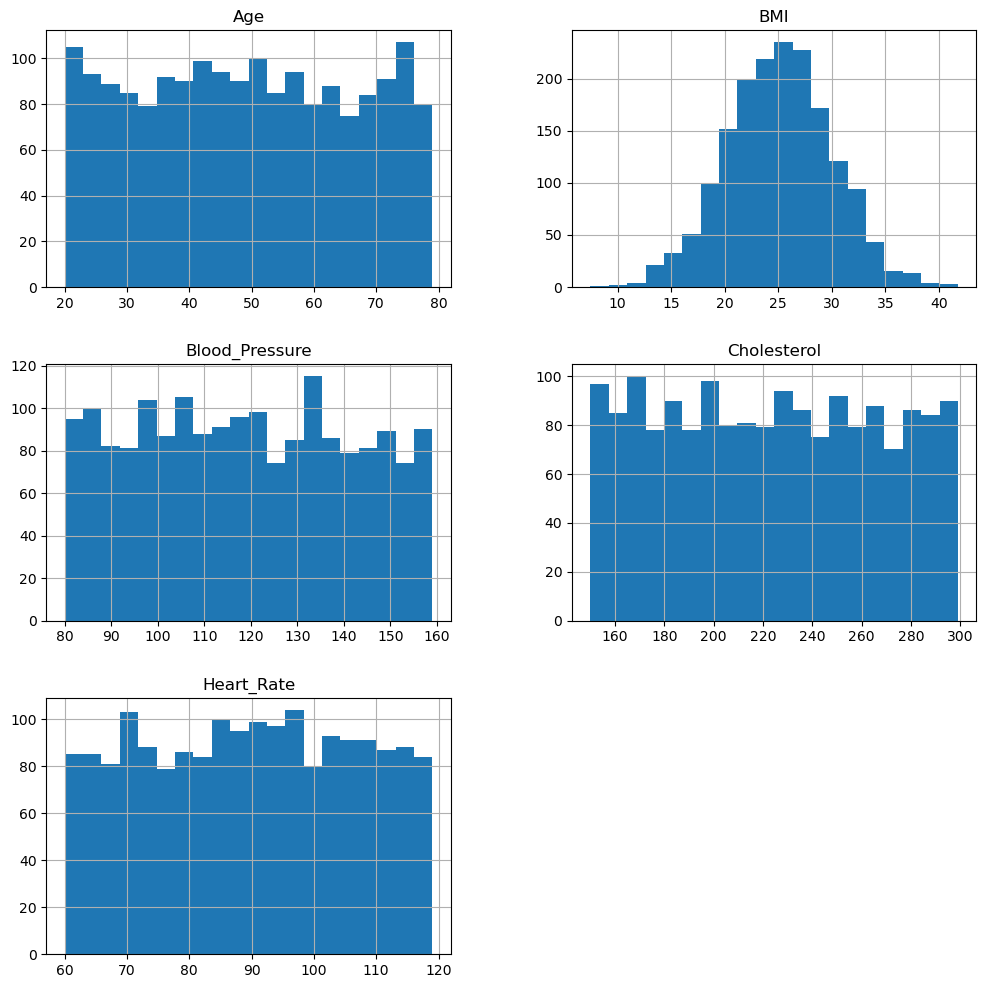

In [9]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

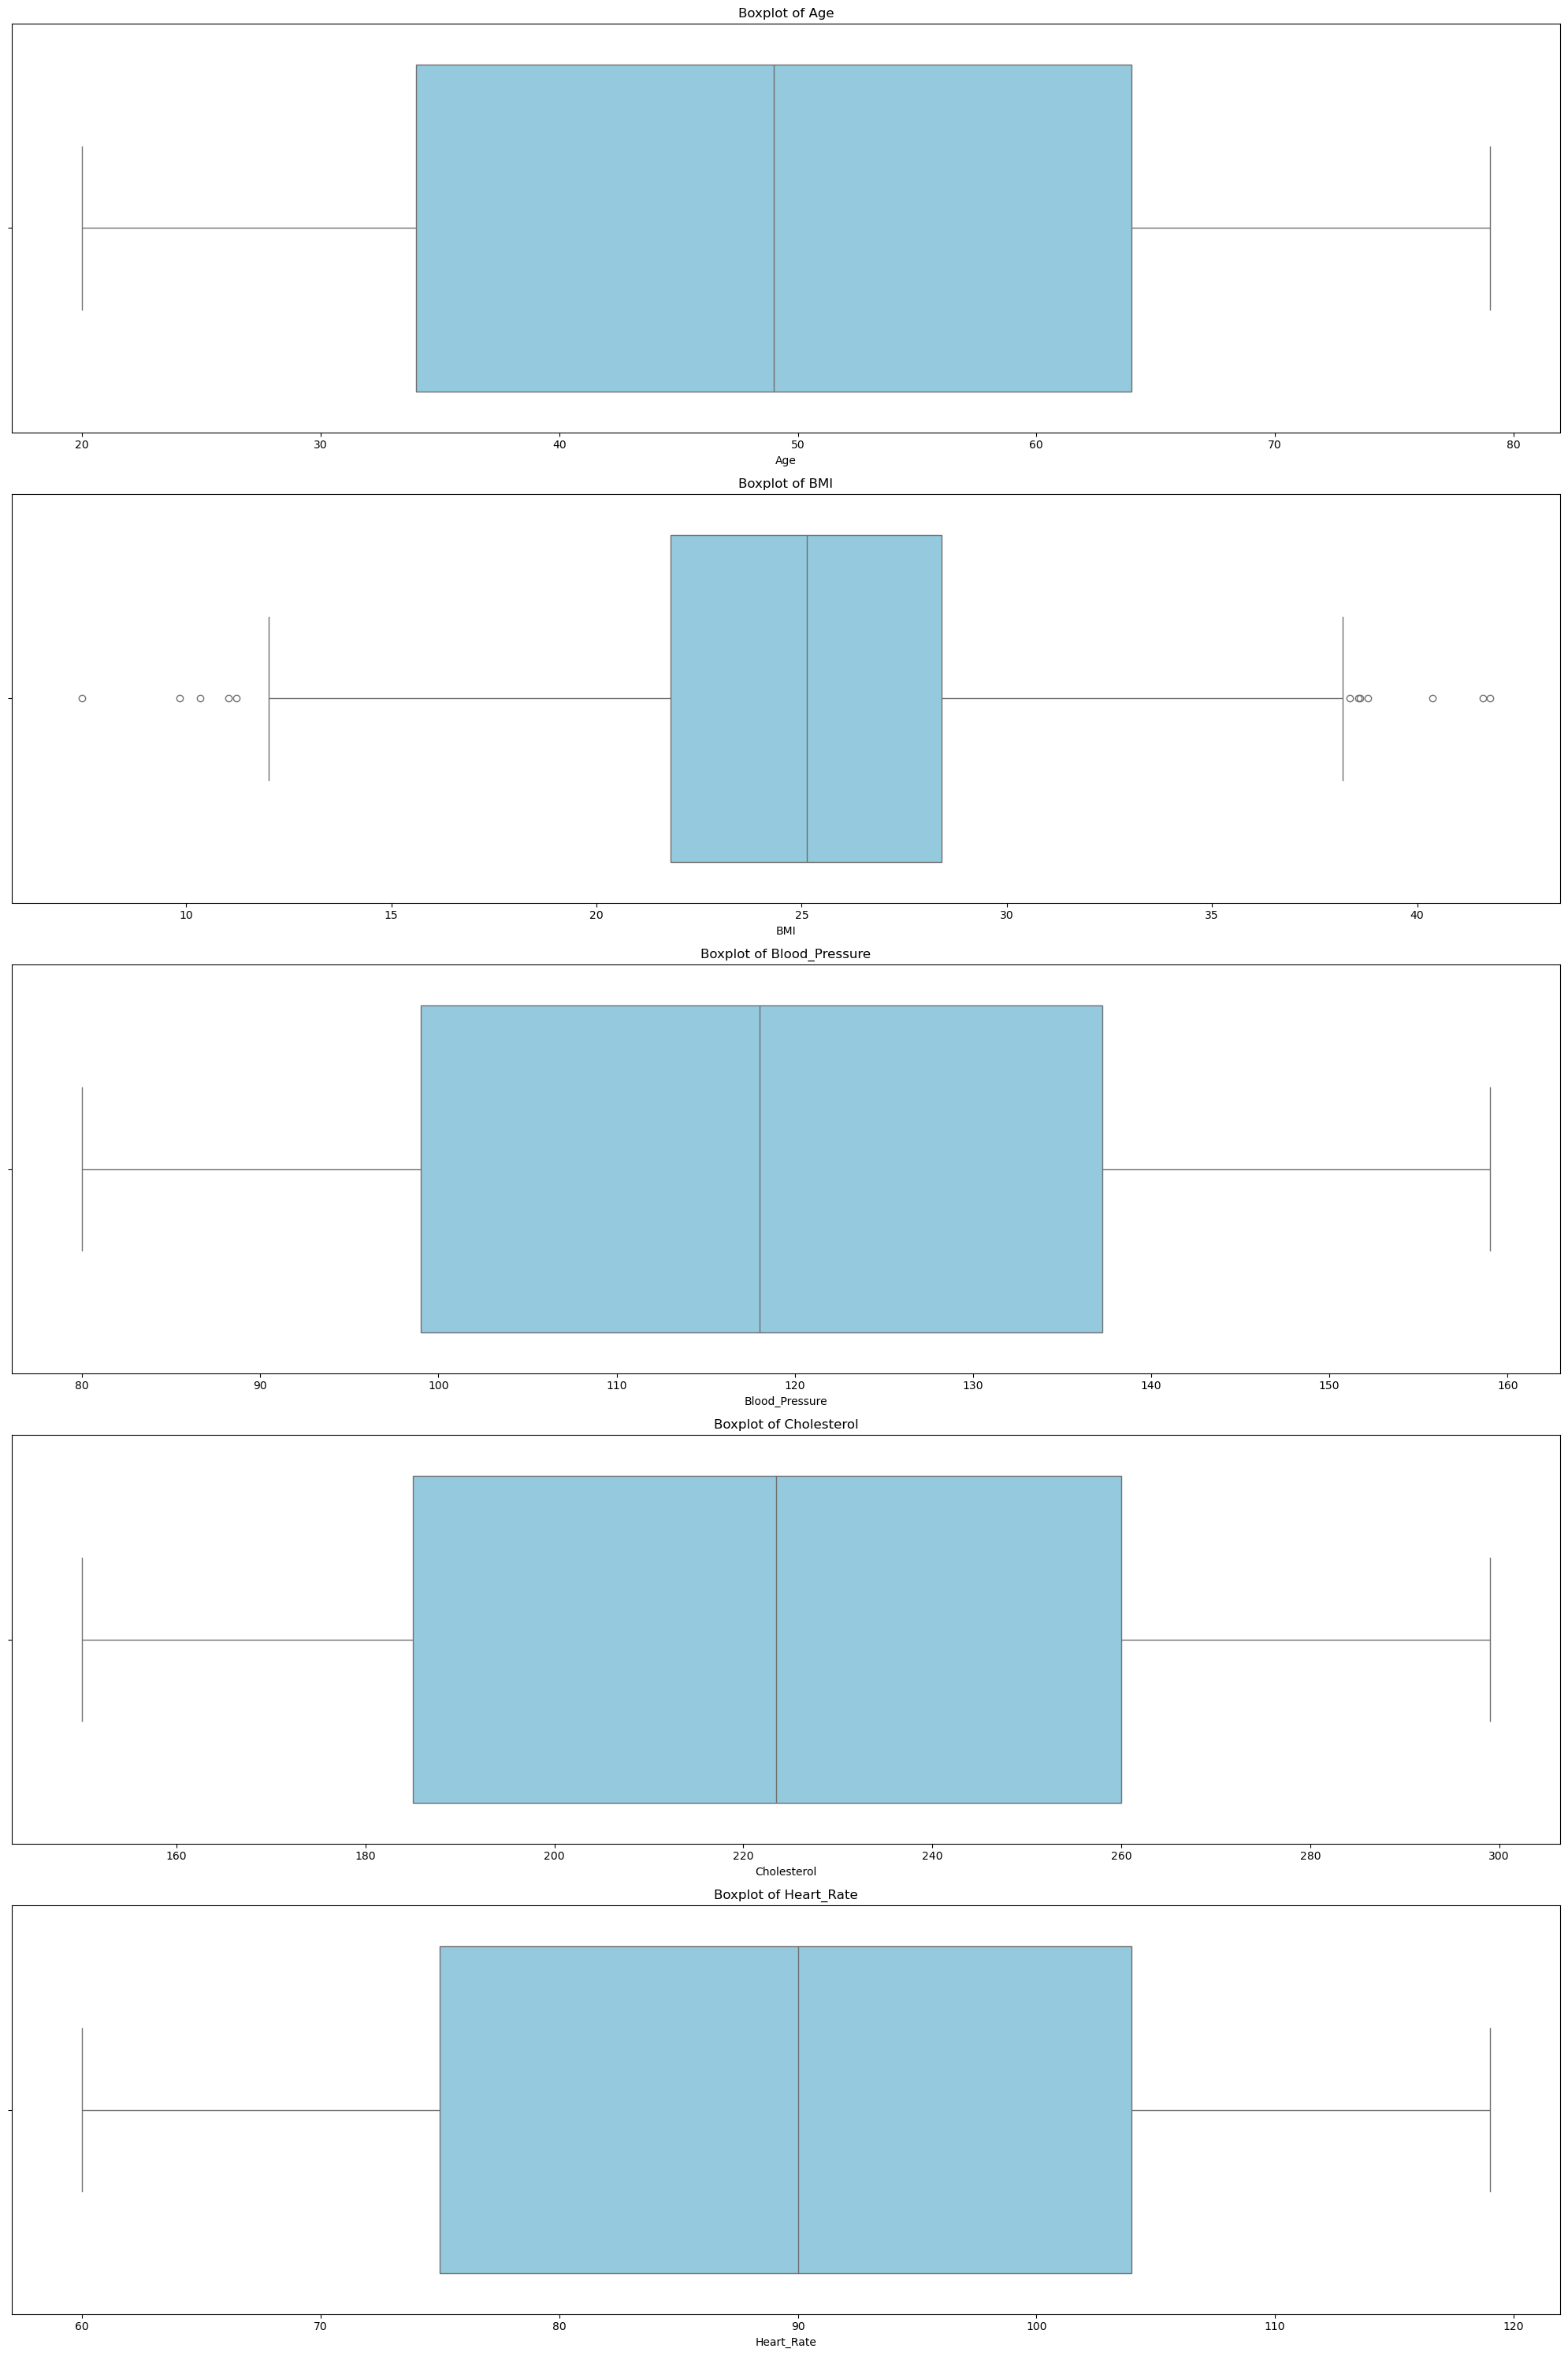

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for boxplot analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(20, 30))

# Plot boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

In [11]:
numerical_data.nunique()

Age                 60
BMI               1710
Blood_Pressure      80
Cholesterol        150
Heart_Rate          60
dtype: int64

In [12]:
numerical_data.isnull().sum()

Age                0
BMI               90
Blood_Pressure     0
Cholesterol       90
Heart_Rate         0
dtype: int64

In [13]:
# unique values counts
unique_counts=categorical_data.nunique()
print(unique_counts)

Smoking_Habit              2
Physical_Activity_Level    3
Family_History             2
Disease_Type               3
dtype: int64


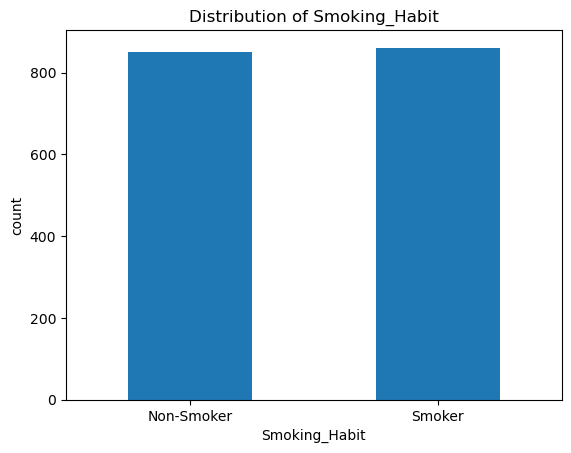

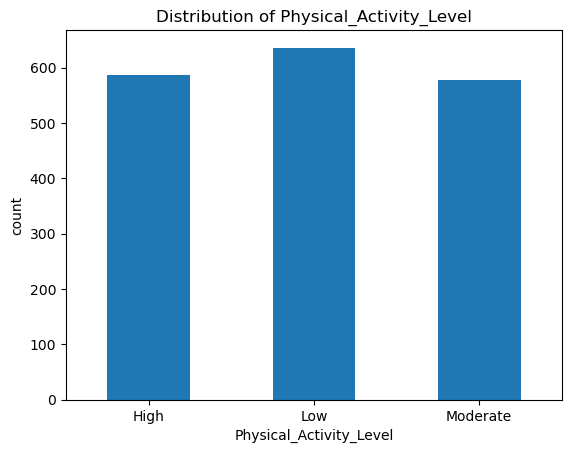

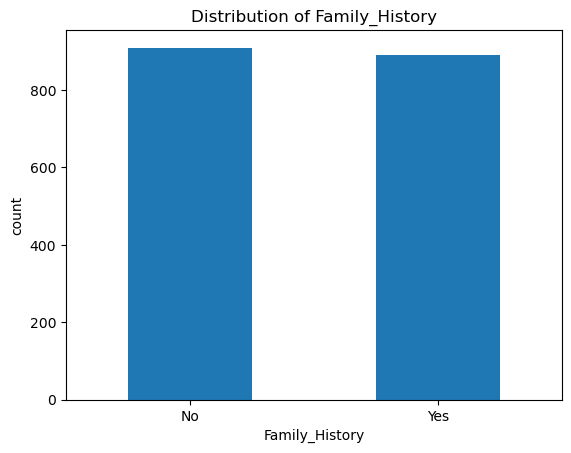

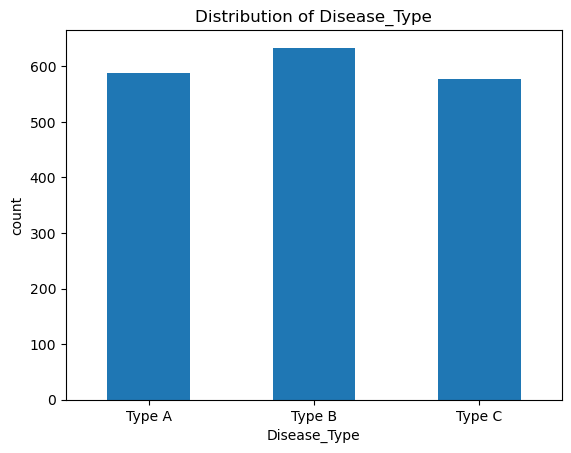

In [14]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

In [15]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,Age,BMI,Blood_Pressure,Cholesterol,Heart_Rate
Age,1.000000,0.031719,-0.004336,0.011312,-0.017017
BMI,0.031719,1.000000,-0.006668,0.014269,-0.000168
Blood_Pressure,-0.004336,-0.006668,1.000000,-0.022515,0.003458
Cholesterol,0.011312,0.014269,-0.022515,1.000000,-0.018793
Heart_Rate,-0.017017,-0.000168,0.003458,-0.018793,1.000000


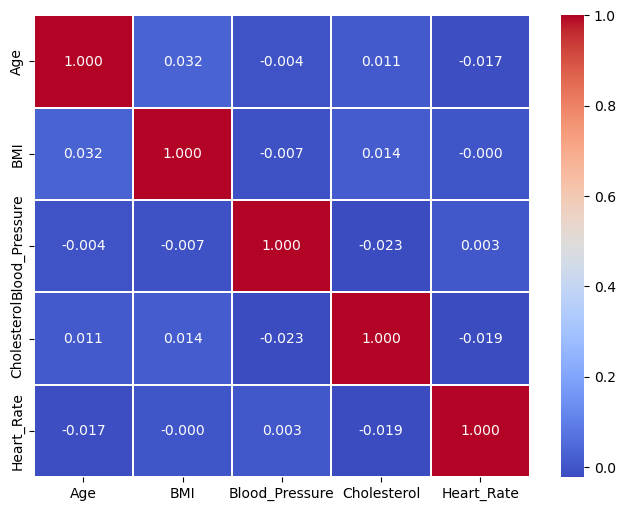

In [16]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

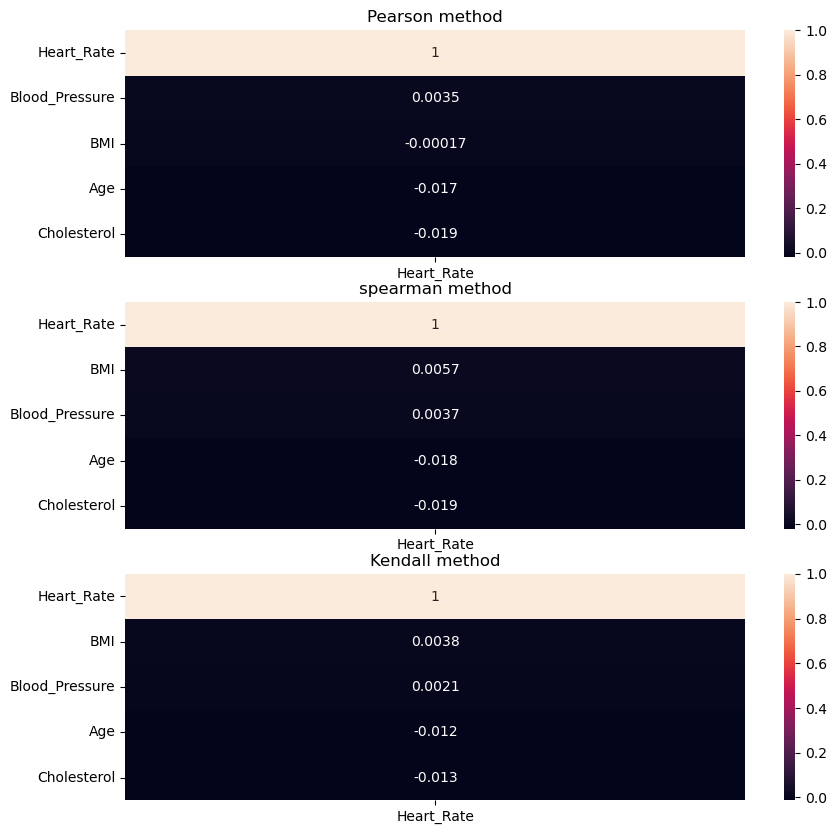

In [34]:
fig, ax = plt.subplots(3,1, figsize=(10, 10))
## Correlation coefficient using different methods
corr1 = numerical_data.corr('pearson')[['Heart_Rate']].sort_values(by='Heart_Rate', ascending=False)
corr2 = numerical_data.corr('spearman')[['Heart_Rate']].sort_values(by='Heart_Rate', ascending=False)
corr3 = numerical_data.corr('kendall')[['Heart_Rate']].sort_values(by='Heart_Rate', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')

## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

In [35]:
# Replace 'disease_type' with your actual target column name
print(df.columns)
target_col = 'Disease_Type'  # <-- change this if needed

# Group instances based on the classes in the target variable
class_counts = df[target_col].value_counts()

columns = ['class', 'count', 'percentage']
classes = class_counts.index.tolist()
count = class_counts.values.tolist()
percentage = [(c / len(df)) * 100 for c in count]

# Convert the calculated values into a dataframe
imbalance_df = pd.DataFrame(list(zip(classes, count, percentage)), columns=columns)
imbalance_df

Index(['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Heart_Rate',
       'Smoking_Habit', 'Physical_Activity_Level', 'Family_History',
       'Disease_Type'],
      dtype='object')


,class,count,percentage
0,Type B,634,35.222222
1,Type A,589,32.722222
2,Type C,577,32.055556


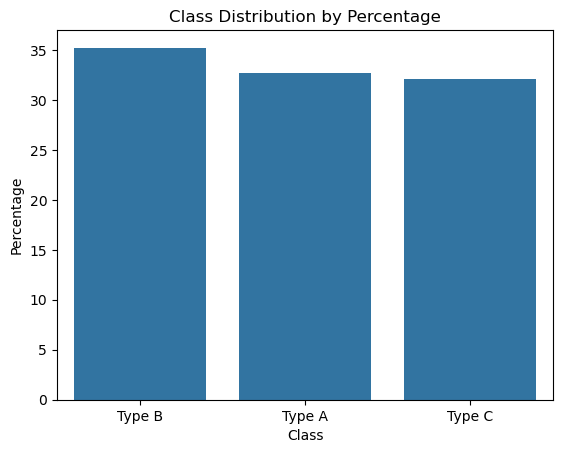

In [36]:
sns.barplot(x='class', y='percentage', data=imbalance_df)
plt.title('Class Distribution by Percentage')
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.show()

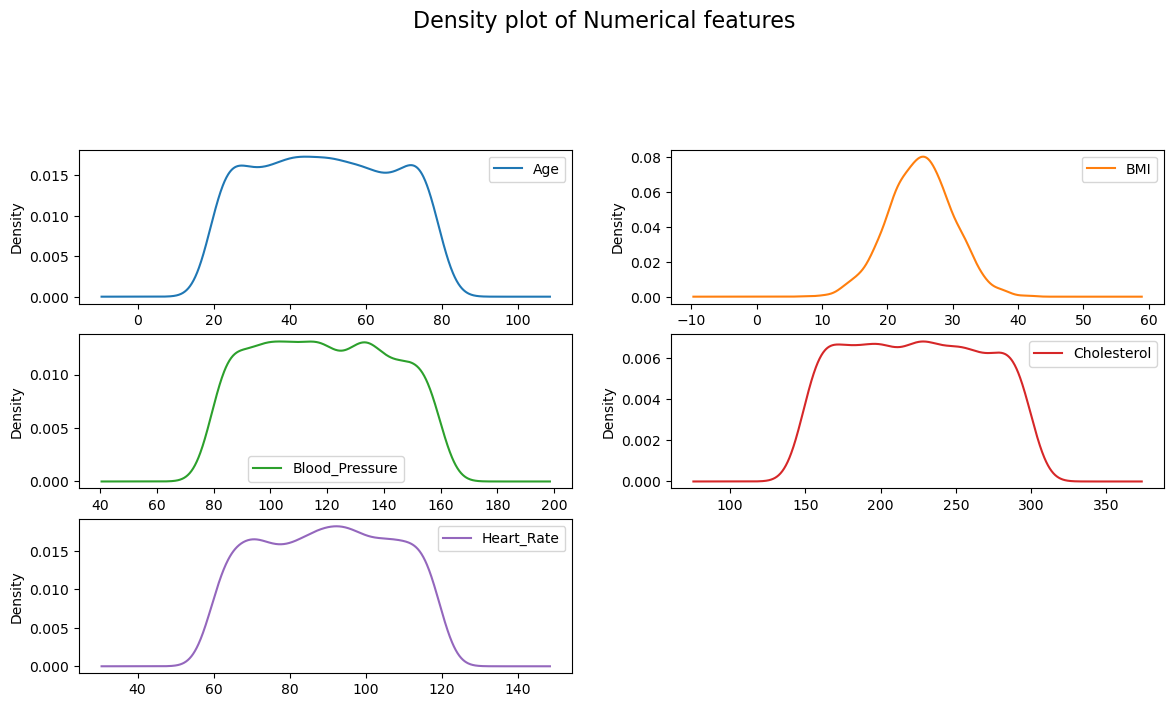

In [41]:
numerical_data.plot(kind='density', figsize=(14, 14), subplots=True, layout=(6, 2), 
                    title="Density plot of Numerical features", sharex=False)
plt.suptitle("Density plot of Numerical features", fontsize=16)
plt.show()


## 4. Dataset Pre-processing

We handle null values, encode categorical data, and scale features.

Number of duplicate rows: 0
Missing values per column:
 Age                        0
BMI                        0
Blood_Pressure             0
Cholesterol                0
Heart_Rate                 0
Smoking_Habit              0
Physical_Activity_Level    0
Family_History             0
Disease_Type               0
dtype: int64


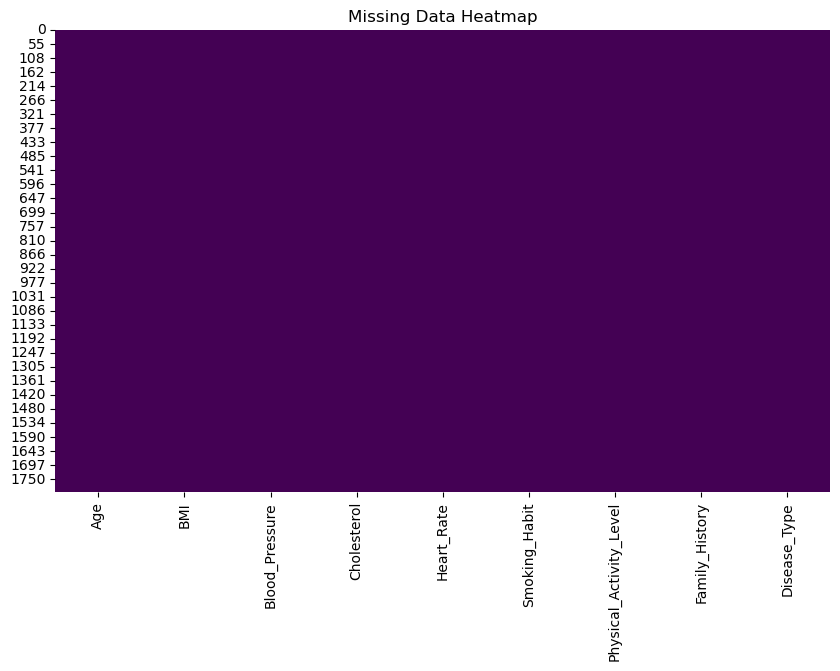

Unique values in Smoking_Habit: ['Non-Smoker' 'Smoker']
Unique values in Physical_Activity_Level: ['High' 'Low' 'Moderate']
Unique values in Family_History: ['No' 'Yes']
Unique values in Disease_Type: ['Type B' 'Type C' 'Type A']


In [47]:
# ...existing code...

# Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Check for missing values
missing_per_column = df.isnull().sum()
print("Missing values per column:\n", missing_per_column)

# Visualize missing data (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Check for inconsistent categorical values
for col in categorical_features:
    print(f"Unique values in {col}: {df[col].unique()}")

In [56]:
# Check for null values
print("Null values per column:\n", df.isnull().sum())

# Drop duplicate rows if any
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
df = df.drop_duplicates()

Null values per column:
 Age                        0
BMI                        0
Blood_Pressure             0
Cholesterol                0
Heart_Rate                 0
Smoking_Habit              0
Physical_Activity_Level    0
Family_History             0
Disease_Type               0
dtype: int64
Number of duplicate rows: 0


In [57]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Smoking_Habit', 'Physical_Activity_Level', 'Family_History']
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Encode target variable
df_encoded['Disease_Type_enc'] = le.fit_transform(df_encoded['Disease_Type'])
df_encoded = df_encoded.drop(['Disease_Type'], axis=1)

In [58]:
from sklearn.preprocessing import RobustScaler

numerical_cols = ['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Heart_Rate']
scaler = RobustScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [59]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Disease_Type_enc'])
y = df_encoded['Disease_Type_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1082, 8)
y_train shape: (1082,)
X_test shape: (465, 8)
y_test shape: (465,)


## 5. Model Training

We apply KNN, Decision Tree, Logistic Regression, Naive Bayes, and Neural Network classifiers.

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNN model (you can change n_neighbors as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.3139784946236559
Confusion Matrix:
 [[57 66 34]
 [68 56 37]
 [65 49 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.36      0.33       157
           1       0.33      0.35      0.34       161
           2       0.32      0.22      0.26       147

    accuracy                           0.31       465
   macro avg       0.31      0.31      0.31       465
weighted avg       0.31      0.31      0.31       465



In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm)

cm_svm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_svm)

TN = cm_svm[0][0]
TP = cm_svm[1][1]
FN = cm_svm[1][0]
FP = cm_svm[0][1]

ps_svm = TP/(TP+FP)
r_svm = TP/(TP+FN)
f1_svm = (2*ps_svm*r_svm)/(ps_svm+r_svm)

print('Precision score:', ps_svm)
print('Recall score:', r_svm)
print('F1 score:', f1_svm)

Accuracy: 0.3053763440860215
Confusion Matrix:
 [[52 63 42]
 [69 45 47]
 [48 54 45]]
Precision score: 0.4166666666666667
Recall score: 0.39473684210526316
F1 score: 0.40540540540540543


## 6. Model Evaluation

We compare performance of each model.

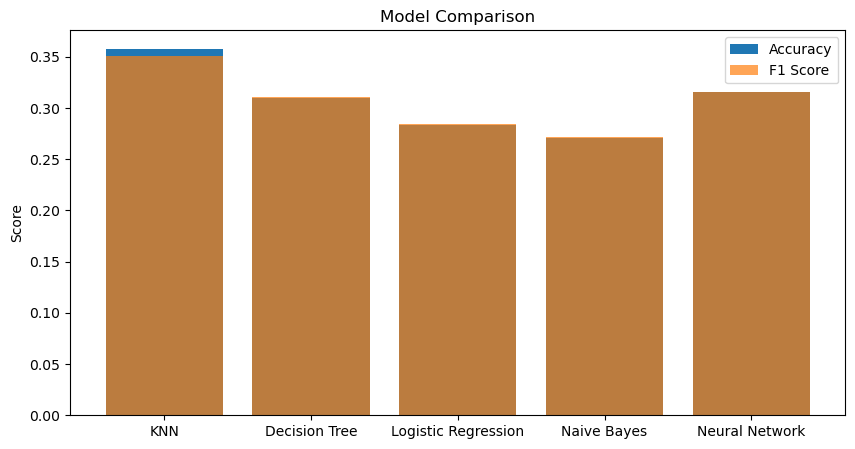


KNN Confusion Matrix:
 [[50 37 17]
 [46 42 28]
 [38 33 19]]

Decision Tree Confusion Matrix:
 [[29 34 41]
 [37 40 39]
 [31 32 27]]

Logistic Regression Confusion Matrix:
 [[30 38 36]
 [38 32 46]
 [33 31 26]]

Naive Bayes Confusion Matrix:
 [[29 42 33]
 [37 34 45]
 [35 34 21]]

Neural Network Confusion Matrix:
 [[36 29 39]
 [47 31 38]
 [31 28 31]]


In [8]:
# Plot Accuracy and F1 Score
acc = [results[m]['Accuracy'] for m in models]
f1s = [results[m]['F1 Score'] for m in models]

plt.figure(figsize=(10,5))
plt.bar(models.keys(), acc, label='Accuracy')
plt.bar(models.keys(), f1s, alpha=0.7, label='F1 Score')
plt.title("Model Comparison")
plt.ylabel("Score")
plt.legend()
plt.show()

# Display confusion matrices
for name in results:
    print(f"\n{name} Confusion Matrix:\n", results[name]['Confusion Matrix'])

## 7. Conclusion

Based on evaluation metrics, we identify the best model and reflect on the possible reasons behind its performance.